# Figure 5 from the original paper

This notebook reproduces (more or less) Figure 5 from the paper https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5324576/. Please refer to the paper for an explanation. This notebook is simply a demonstration of the use of the gcmi module.

## Imports
The gcmi module is in the git repo next to this notebook

In [49]:
import gcmi
import numpy as np

## Global parameters

In [50]:
mean = np.array([0, 0])
correlation = 0.6
sigma = np.array([[1, correlation], [correlation, 1]])
data_size = 50000

Below, we only plot a subset of the points. These variables control that.

In [51]:
plot_points = 500
plot_idx = np.random.choice(plot_points, plot_points, replace=False)

## Generate features

Generate the two stimulus signals. They have the mean and correlation defined above.

In [52]:
stim = np.random.multivariate_normal(mean, sigma, data_size)

Generate Response A. It is the first stimulus plus noise

In [53]:
respA = np.random.randn(data_size) + stim[:,0]

Generate Response B. It is the mean of the two stimuluses plus noise.

In [54]:
respB = np.random.randn(data_size) + stim.mean(axis=1)

Plot the two stimuluses against each other to make sure they look right.

Text(0,0.5,'Stimulus 2')

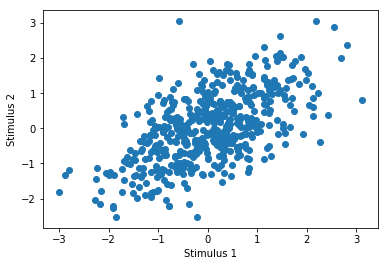

In [55]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
plt.scatter(stim[plot_idx,0], stim[plot_idx,1])
ax.set_xlabel("Stimulus 1")
ax.set_ylabel("Stimulus 2")

## Calculate MI and CMI
Now plot the stimulus versus response.
In addition, we calculuate the mutual information between the stimulus and the response.
Finally, we calculate the conditional mutual information between the stimulus and one response conditioned on the the other stimulus.

### Stimulus 1 &rarr; Response A
Here, we plot Response A against Stimulus 1 and calculate the following:
* $MI(Response A; Stimulus 1)$
* $CMI(Response A; Stimulus 1 | Stimulus 2)$

Text(0,0.5,'Stimulus 1')

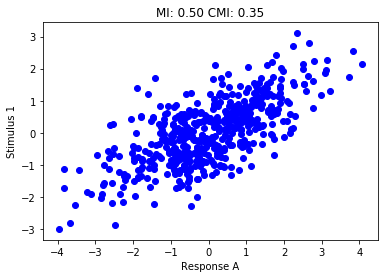

In [56]:
fig, ax = plt.subplots(1)
plt.scatter(respA[plot_idx], stim[plot_idx,0], c='b')
mi = gcmi.mi_gg(stim[:,0], respA, biascorrect=True, demeaned=True)
cmi = gcmi.cmi_ggg(stim[:,0], respA, stim[:,1], biascorrect=True, demeaned=True)
plt.title(f"MI: {mi:0.2f} CMI: {cmi:0.2f}")
ax.set_xlabel("Response A")
ax.set_ylabel("Stimulus 1")

Here, we plot Response A against Stimulus 2 and calcuate the following:
* $MI(Response A; Stimulus 2)$
* $CMI(Response A; Stimulus 2 | Stimulus 1)$

Text(0,0.5,'Stimulus 2')

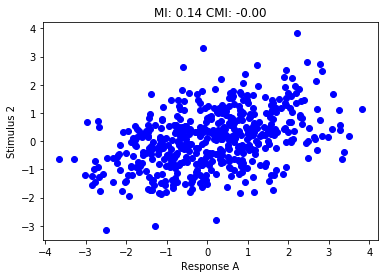

In [57]:
plt.scatter(respA[idx], stim[idx,1], c='b')
mi = gcmi.mi_gg(stim[:,1], respA, biascorrect=True, demeaned=True)
cmi = gcmi.cmi_ggg(stim[:,1], respA, stim[:,0], biascorrect=True, demeaned=True)
plt.title(f"MI: {mi:0.2f} CMI: {cmi:0.2f}")
plt.gca().set_xlabel("Response A")
plt.gca().set_ylabel("Stimulus 2")

Note that the MI is non-zero but the CMI is 0. This is because Stimulus 2 is correlated with Stimulus 1 but Response A has no actual dependence on Stimulus 2 because it is only a function of Stimulus 1. The MI includes the correlation between Stimulus 1 and Stimulus 2. The CMI excludes it.

### Stimulus 1 + Stimulus2 &rarr; ResponseB
Here, we plot Response B against Stimulus 1 and calculate the following:
* $MI(Response B; Stimulus 1)$
* $CMI(Response B; Stimulus 1|Stimulus 2)$

Text(0,0.5,'Stimulus 1')

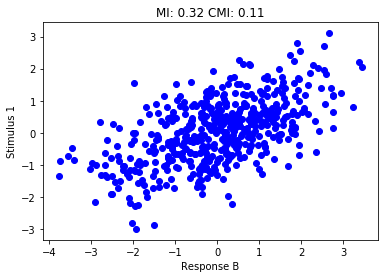

In [58]:
fig, ax = plt.subplots(1)
plt.scatter(respB[plot_idx], stim[plot_idx,0], c='b')
mi = gcmi.mi_gg(stim[:,0], respB, biascorrect=True, demeaned=True)
cmi = gcmi.cmi_ggg(stim[:,0], respB, stim[:,1], biascorrect=True, demeaned=True)
plt.title(f"MI: {mi:0.2f} CMI: {cmi:0.2f}")
ax.set_xlabel("Response B")
ax.set_ylabel("Stimulus 1")

Here, we plot Response B against Stimulus 2 and calculate the following:
* $MI(Response B; Stimulus 2)$
* $CMI(Response B; Stimulus 2|Stimulus 1)$

Text(0,0.5,'Stimulus 2')

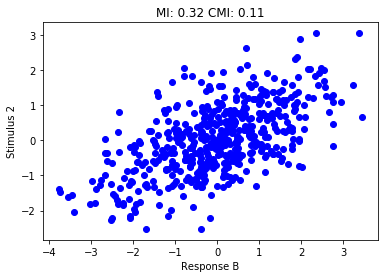

In [59]:
fig, ax = plt.subplots(1)
plt.scatter(respB[plot_idx], stim[plot_idx,1], c='b')
mi = gcmi.mi_gg(stim[:,1], respB, biascorrect=True, demeaned=True)
cmi = gcmi.cmi_ggg(stim[:,1], respB, stim[:,0], biascorrect=True, demeaned=True)
plt.title(f"MI: {mi:0.2f} CMI: {cmi:0.2f}")
ax.set_xlabel("Response B")
ax.set_ylabel("Stimulus 2")